In [27]:
#Hi

### Documentation of Exploratory Data Analysis (EDA) and Dimensionality Reduction for the Advertising Click Dataset

#### 1. Data Exploration and Understanding
- **Initial Data Overview**:
  - Use functions like `head()` and `info()` to get a general view of the data structure and number of records.
  - Examine the data types in each column (numerical, textual, categorical).
  - Identify the target column, `Clicked on Ad`, which indicates whether a user clicked on the advertisement.

- **Descriptive Statistics**:
  - Use functions like `describe()` to examine the distribution of numerical values.
  - Calculate the mean, median, and standard deviation for each column.

#### 2. Handling Duplicates and Missing Data
- **Identifying Duplicate Records**:
  - Check for and remove duplicate records in the dataset.

- **Handling Missing Data**:
  - Identify columns with missing values.
  - Decide whether to remove or impute missing values using methods like mean or median imputation.

#### 3. Analyzing Numerical Data
- **Distribution of Numerical Features**:
  - Plot histograms to observe the distribution of each numerical feature.
  - Identify outliers and unusual values.

- **Box Plot Visualization**:
  - Use box plots to visualize the distribution and identify outliers.

#### 4. Analyzing Categorical Data
- **Distribution of Categorical Features**:
  - Plot bar charts to observe the distribution of each categorical feature.
  - Examine the frequency of each category.

- **Temporal Feature Analysis**:
  - Extract temporal features from the `Timestamp` column, such as hour, day of the week, and month.
  - Investigate the impact of time on click probability.

#### 5. Investigating Feature Relationships
- **Correlation Matrix**:
  - Use a heatmap to visualize the correlation between features.
  - Identify features that have the highest correlation with the target column.

- **Pair Plot Analysis**:
  - Plot pair plots to examine the relationships between numerical and categorical features.

#### 6. Data Transformation and Preparation
- **Standardization**:
  - Standardize numerical features to have a mean of zero and a standard deviation of one.

- **Encoding Categorical Features**:
  - Convert categorical features into numerical values using One-Hot Encoding.

- **Feature Engineering**:
  - Create new features from existing ones, such as extracting hour, day of the week, and month from the `Timestamp`.
  - Perform clustering using KMeans and add cluster labels as a new feature.

#### 7. Applying Dimensionality Reduction Techniques
- **Principal Component Analysis (PCA)**:
  - Apply PCA to reduce the dimensionality of the data while retaining the maximum variance.
  - Choose the appropriate number of principal components for modeling.

- **Linear Discriminant Analysis (LDA)**:
  - Apply LDA to reduce dimensionality with consideration of the labels.
  - LDA selects dimensions that maximize class separability.

#### 8. Evaluating Classification Models
- **Cross-Validation**:
  - Use cross-validation techniques to evaluate models.
  - Split the data into training and testing sets to assess model performance.

- **Implementing Various Classification Algorithms**:
  - Implement and evaluate algorithms such as Logistic Regression, Random Forest, Gradient Boosting, and SVM.
  - Compare the performance of these algorithms using evaluation metrics like accuracy.

### 9. Comparing Results and Selecting the Best Model
After evaluating the models using the original data, PCA-reduced data, LDA-reduced data, and clustered data, compare the performance of the models to select the best data preparation method and the best model for predicting advertisement clicks.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/Users/asus/Desktop/archive (7)/ad_10000records.csv')

In [3]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,Male,Svalbard & Jan Mayen Islands,2016-06-09 21:43:05,0
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,Male,Singapore,2016-01-16 17:56:05,0
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,Female,Guadeloupe,2016-06-29 10:50:45,0
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,Female,Zambia,2016-06-21 14:32:32,0
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,Female,Qatar,2016-07-21 10:54:35,1


In [4]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
9995,41.73,31.0,61840.26,207.17,Profound executive flexibility,West Angelabury,Male,Singapore,2016-01-03 03:22:15,1
9996,41.73,28.0,51501.38,120.49,Managed zero tolerance concept,Kennedyfurt,Male,Luxembourg,2016-05-28 12:20:15,0
9997,55.60,39.0,38067.08,124.44,Intuitive exuding service-desk,North Randy,Female,Egypt,2016-01-05 11:53:17,0
9998,46.61,50.0,43974.49,123.13,Realigned content-based leverage,North Samantha,Female,Malawi,2016-04-04 07:07:46,1
9999,46.61,43.0,60575.99,198.45,Optimized upward-trending productivity,Port Jeffrey,Male,Northern Mariana Islands,2016-04-03 21:13:46,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [6]:
data.nunique()

Daily Time Spent on Site    460
Age                          39
Area Income                 524
Daily Internet Usage        505
Ad Topic Line               559
City                        521
Gender                        2
Country                     207
Timestamp                   567
Clicked on Ad                 2
dtype: int64

In [7]:
data.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [10]:
(data.isnull().sum()/(len(data)))*100

Daily Time Spent on Site    0.0
Age                         0.0
Area Income                 0.0
Daily Internet Usage        0.0
Ad Topic Line               0.0
City                        0.0
Gender                      0.0
Country                     0.0
Timestamp                   0.0
Clicked on Ad               0.0
dtype: float64

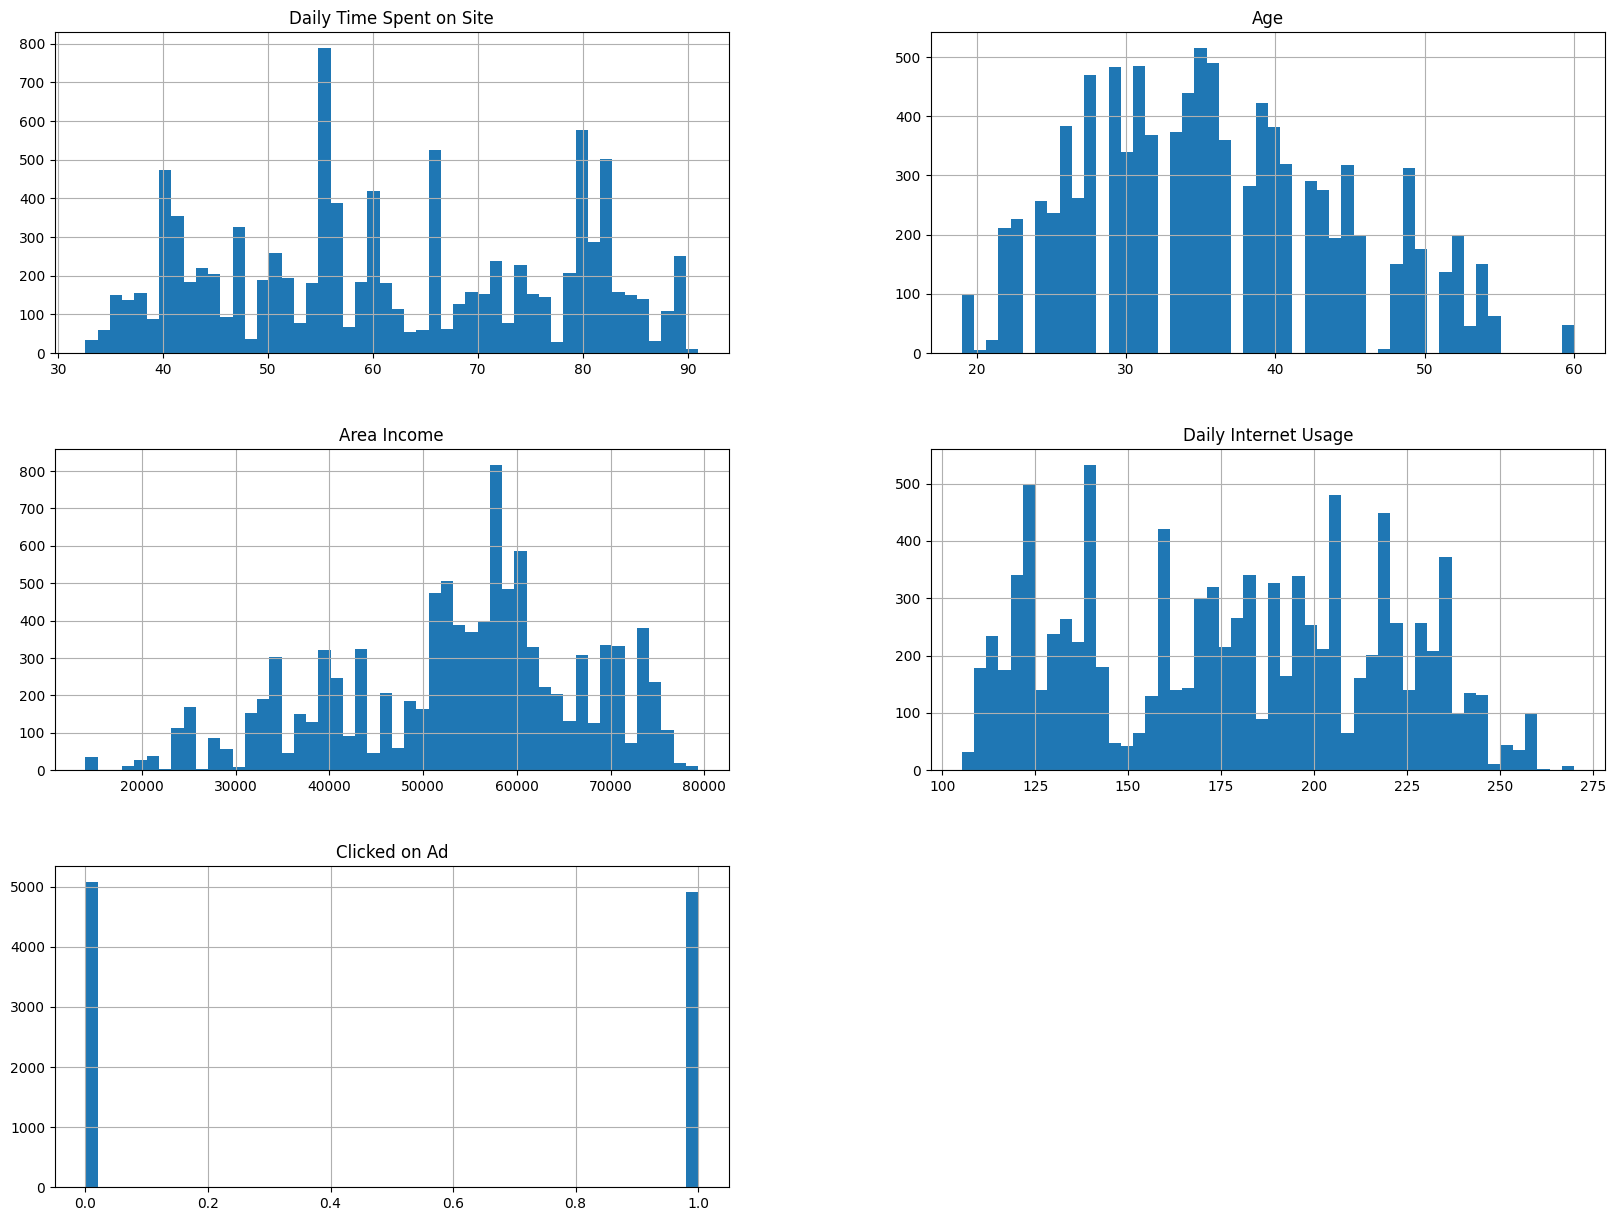

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()


<Figure size 1000x600 with 0 Axes>

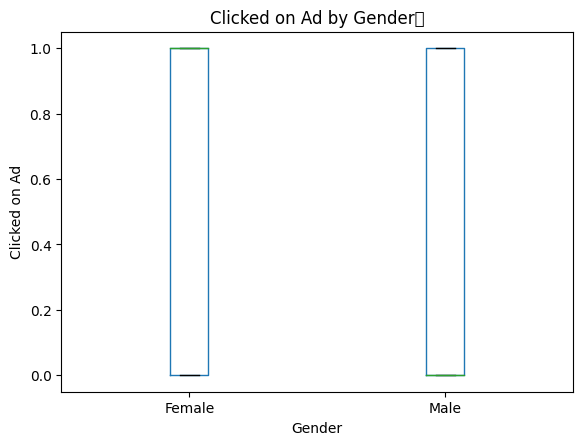

In [12]:
plt.figure(figsize=(10, 6))
data.boxplot(column='Clicked on Ad', by='Gender', grid=False)
plt.title('Clicked on Ad by Gender	')
plt.suptitle('')  
plt.xlabel('Gender')
plt.ylabel('Clicked on Ad')
plt.show()

In [13]:
from scipy.stats import ttest_ind


developed = data[data['Gender'] == 'Male']['Daily Time Spent on Site']
developing = data[data['Gender'] == 'Female']['Daily Time Spent on Site']


t_stat, p_val = ttest_ind(developed, developing, nan_policy='omit')

t_stat, p_val

(3.564482396066224, 0.00036627528158953446)

In [14]:
developed = data[data['Gender'] == 'Male']['Clicked on Ad']
developing = data[data['Gender'] == 'Female']['Clicked on Ad']


t_stat, p_val = ttest_ind(developed, developing, nan_policy='omit')

t_stat, p_val

(-4.9651708114570585, 6.977455968111122e-07)

In [15]:
from scipy.stats import f_oneway


Ages = data['Age'].unique()
life_expectancy_by_year = [data[data['Age'] == Age]['Clicked on Ad'].dropna() for Age in Ages]


f_stat_year, p_val_year = f_oneway(*life_expectancy_by_year)

f_stat_year, p_val_year

(103.52871851543989, 0.0)

In [16]:
numerical_columns = ['Clicked on Ad', 'Daily Time Spent on Site', 'Age', 'Daily Internet Usage', 'Area Income']
for col in numerical_columns:
    data[col].fillna(data[col].median(), inplace=True)


categorical_columns = ['Ad Topic Line', 'City', 'Gender','Country']
for col in categorical_columns:
    data[col].fillna(data[col].mode(), inplace=True)

In [17]:

missing_values_summary_after = data.isnull().sum()
missing_values_summary_after[missing_values_summary_after > 0]

Series([], dtype: int64)

In [18]:
correlations = data[numerical_columns].corr()


life_expectancy_correlations = correlations['Clicked on Ad'].sort_values(ascending=False)


life_expectancy_correlations

Clicked on Ad               1.000000
Age                         0.460383
Daily Time Spent on Site    0.091034
Area Income                -0.067631
Daily Internet Usage       -0.129412
Name: Clicked on Ad, dtype: float64

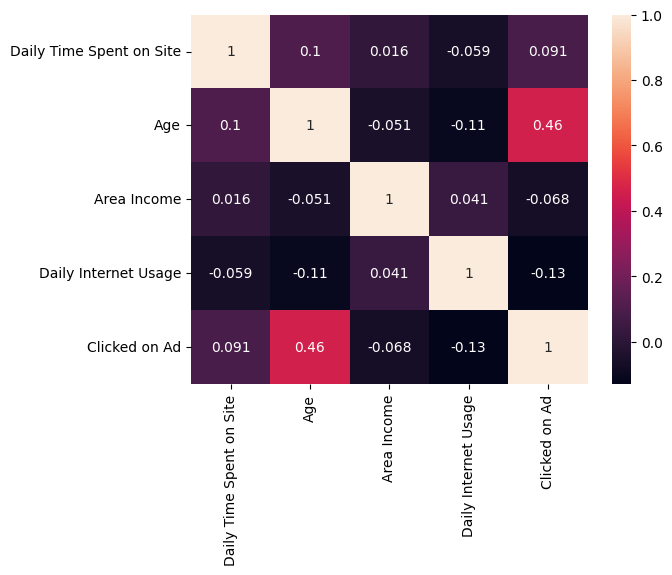

In [19]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Male' else 0)


In [21]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
data['Day'] = data['Timestamp'].dt.day
data['Month'] = data['Timestamp'].dt.month
data['Year'] = data['Timestamp'].dt.year
data = data.drop(columns=['Timestamp'])


In [22]:
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Clicked on Ad,Hour,Day,Month,Year
0,62.26,32.0,69481.85,172.83,Decentralized real-time circuit,Lisafort,1,Svalbard & Jan Mayen Islands,0,21,9,6,2016
1,41.73,31.0,61840.26,207.17,Optional full-range projection,West Angelabury,1,Singapore,0,17,16,1,2016
2,44.40,30.0,57877.15,172.83,Total 5thgeneration standardization,Reyesfurt,0,Guadeloupe,0,10,29,6,2016
3,59.88,28.0,56180.93,207.17,Balanced empowering success,New Michael,0,Zambia,0,14,21,6,2016
4,49.21,30.0,54324.73,201.58,Total 5thgeneration standardization,West Richard,0,Qatar,1,10,21,7,2016


In [23]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(data[['City', 'Country', 'Gender']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['City', 'Country', 'Gender']))

In [24]:
df = pd.concat([data, encoded_df], axis=1)
df.drop(['City', 'Country', 'Gender', 'Ad Topic Line'], axis=1, inplace=True)


In [25]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Hour,Day,Month,Year,City_Alexanderfurt,...,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Wallis and Futuna,Country_Western Sahara,Country_Yemen,Country_Zambia,Country_Zimbabwe,Gender_0,Gender_1
0,62.26,32.0,69481.85,172.83,0,21,9,6,2016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,41.73,31.0,61840.26,207.17,0,17,16,1,2016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,44.40,30.0,57877.15,172.83,0,10,29,6,2016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,59.88,28.0,56180.93,207.17,0,14,21,6,2016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,49.21,30.0,54324.73,201.58,1,10,21,7,2016,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)


cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')


print("Original Data - Cross-Validation Scores:", cv_scores)
print("Original Data - Mean Accuracy:", np.mean(cv_scores))

Original Data - Cross-Validation Scores: [0.866  0.8675 0.872  0.878  0.8835]
Original Data - Mean Accuracy: 0.8734


In [29]:

pca = PCA(n_components= 2)  
X_pca = pca.fit_transform(X_scaled)


cv_scores_pca = cross_val_score(model, X_pca, y, cv=5, scoring='accuracy')


print("PCA Data - Cross-Validation Scores:", cv_scores_pca)
print("PCA Data - Mean Accuracy:", np.mean(cv_scores_pca))


PCA Data - Cross-Validation Scores: [0.759  0.7545 0.76   0.763  0.754 ]
PCA Data - Mean Accuracy: 0.7581


In [30]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

X_cluster = df.drop('Clicked on Ad', axis=1)

X_cluster_scaled = scaler.fit_transform(X_cluster)

cv_scores_cluster = cross_val_score(model, X_cluster_scaled, y, cv=5, scoring='accuracy')


print("Clustered Data - Cross-Validation Scores:", cv_scores_cluster)
print("Clustered Data - Mean Accuracy:", np.mean(cv_scores_cluster))


Clustered Data - Cross-Validation Scores: [0.8675 0.874  0.87   0.878  0.873 ]
Clustered Data - Mean Accuracy: 0.8724999999999999


In [31]:
print("Comparison of Models:")
print("Original Data - Mean Accuracy:", np.mean(cv_scores))
print("PCA Data - Mean Accuracy:", np.mean(cv_scores_pca))
print("Clustered Data - Mean Accuracy:", np.mean(cv_scores_cluster))


Comparison of Models:
Original Data - Mean Accuracy: 0.8734
PCA Data - Mean Accuracy: 0.7581
Clustered Data - Mean Accuracy: 0.8724999999999999


In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=1)  
X_lda = lda.fit_transform(X_scaled, y)


In [34]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg_scores = cross_val_score(log_reg, X_scaled, y, cv=5, scoring='accuracy')
log_reg_scores_pca = cross_val_score(log_reg, X_pca, y, cv=5, scoring='accuracy')
log_reg_scores_lda = cross_val_score(log_reg, X_lda, y, cv=5, scoring='accuracy')
log_reg_scores_cluster = cross_val_score(log_reg, X_cluster_scaled, y, cv=5, scoring='accuracy')

print("Logistic Regression - Mean Accuracy (Original):", np.mean(log_reg_scores))
print("Logistic Regression - Mean Accuracy (PCA):", np.mean(log_reg_scores_pca))
print("Logistic Regression - Mean Accuracy (LDA):", np.mean(log_reg_scores_lda))
print("Logistic Regression - Mean Accuracy (Cluster):", np.mean(log_reg_scores_cluster))


Logistic Regression - Mean Accuracy (Original): 0.8644000000000001
Logistic Regression - Mean Accuracy (PCA): 0.7776
Logistic Regression - Mean Accuracy (LDA): 0.8907
Logistic Regression - Mean Accuracy (Cluster): 0.8644999999999999


In [35]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='accuracy')
rf_scores_pca = cross_val_score(rf, X_pca, y, cv=5, scoring='accuracy')
rf_scores_lda = cross_val_score(rf, X_lda, y, cv=5, scoring='accuracy')
rf_scores_cluster = cross_val_score(rf, X_cluster_scaled, y, cv=5, scoring='accuracy')

print("Random Forest - Mean Accuracy (Original):", np.mean(rf_scores))
print("Random Forest - Mean Accuracy (PCA):", np.mean(rf_scores_pca))
print("Random Forest - Mean Accuracy (LDA):", np.mean(rf_scores_lda))
print("Random Forest - Mean Accuracy (Cluster):", np.mean(rf_scores_cluster))


Random Forest - Mean Accuracy (Original): 0.8734
Random Forest - Mean Accuracy (PCA): 0.7581
Random Forest - Mean Accuracy (LDA): 0.8511000000000001
Random Forest - Mean Accuracy (Cluster): 0.8724999999999999


In [36]:
# Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb_scores = cross_val_score(gb, X_scaled, y, cv=5, scoring='accuracy')
gb_scores_pca = cross_val_score(gb, X_pca, y, cv=5, scoring='accuracy')
gb_scores_lda = cross_val_score(gb, X_lda, y, cv=5, scoring='accuracy')
gb_scores_cluster = cross_val_score(gb, X_cluster_scaled, y, cv=5, scoring='accuracy')

print("Gradient Boosting - Mean Accuracy (Original):", np.mean(gb_scores))
print("Gradient Boosting - Mean Accuracy (PCA):", np.mean(gb_scores_pca))
print("Gradient Boosting - Mean Accuracy (LDA):", np.mean(gb_scores_lda))
print("Gradient Boosting - Mean Accuracy (Cluster):", np.mean(gb_scores_cluster))


Gradient Boosting - Mean Accuracy (Original): 0.8148
Gradient Boosting - Mean Accuracy (PCA): 0.7801000000000001
Gradient Boosting - Mean Accuracy (LDA): 0.8892
Gradient Boosting - Mean Accuracy (Cluster): 0.8149000000000001


In [69]:
# Support Vector Machine
svm = SVC(random_state=42)
svm_scores = cross_val_score(svm, X_scaled, y, cv=5, scoring='accuracy')
svm_scores_pca = cross_val_score(svm, X_pca, y, cv=5, scoring='accuracy')
svm_scores_lda = cross_val_score(svm, X_lda, y, cv=5, scoring='accuracy')
svm_scores_cluster = cross_val_score(svm, X_cluster_scaled, y, cv=5, scoring='accuracy')

print("SVM - Mean Accuracy (Original):", np.mean(svm_scores))
print("SVM - Mean Accuracy (PCA):", np.mean(svm_scores_pca))
print("SVM - Mean Accuracy (LDA):", np.mean(svm_scores_lda))
print("SVM - Mean Accuracy (Cluster):", np.mean(svm_scores_cluster))


SVM - Mean Accuracy (Original): 0.8504000000000002
SVM - Mean Accuracy (PCA): 0.7819
SVM - Mean Accuracy (LDA): 0.8916999999999999
SVM - Mean Accuracy (Cluster): 0.8504999999999999


In [70]:
print("Comparison of Models:")

# Logistic Regression
print("Logistic Regression - Mean Accuracy (Original):", np.mean(log_reg_scores))
print("Logistic Regression - Mean Accuracy (PCA):", np.mean(log_reg_scores_pca))
print("Logistic Regression - Mean Accuracy (LDA):", np.mean(log_reg_scores_lda))
print("Logistic Regression - Mean Accuracy (Cluster):", np.mean(log_reg_scores_cluster))

# Random Forest
print("Random Forest - Mean Accuracy (Original):", np.mean(rf_scores))
print("Random Forest - Mean Accuracy (PCA):", np.mean(rf_scores_pca))
print("Random Forest - Mean Accuracy (LDA):", np.mean(rf_scores_lda))
print("Random Forest - Mean Accuracy (Cluster):", np.mean(rf_scores_cluster))

# Gradient Boosting
print("Gradient Boosting - Mean Accuracy (Original):", np.mean(gb_scores))
print("Gradient Boosting - Mean Accuracy (PCA):", np.mean(gb_scores_pca))
print("Gradient Boosting - Mean Accuracy (LDA):", np.mean(gb_scores_lda))
print("Gradient Boosting - Mean Accuracy (Cluster):", np.mean(gb_scores_cluster))

# SVM
print("SVM - Mean Accuracy (Original):", np.mean(svm_scores))
print("SVM - Mean Accuracy (PCA):", np.mean(svm_scores_pca))
print("SVM - Mean Accuracy (LDA):", np.mean(svm_scores_lda))
print("SVM - Mean Accuracy (Cluster):", np.mean(svm_scores_cluster))


Comparison of Models:
Logistic Regression - Mean Accuracy (Original): 0.8644000000000001
Logistic Regression - Mean Accuracy (PCA): 0.7793
Logistic Regression - Mean Accuracy (LDA): 0.8907
Logistic Regression - Mean Accuracy (Cluster): 0.8644999999999999
Random Forest - Mean Accuracy (Original): 0.8734
Random Forest - Mean Accuracy (PCA): 0.7558
Random Forest - Mean Accuracy (LDA): 0.8511000000000001
Random Forest - Mean Accuracy (Cluster): 0.8724999999999999
Gradient Boosting - Mean Accuracy (Original): 0.8148
Gradient Boosting - Mean Accuracy (PCA): 0.78
Gradient Boosting - Mean Accuracy (LDA): 0.8892
Gradient Boosting - Mean Accuracy (Cluster): 0.8149000000000001
SVM - Mean Accuracy (Original): 0.8504000000000002
SVM - Mean Accuracy (PCA): 0.7819
SVM - Mean Accuracy (LDA): 0.8916999999999999
SVM - Mean Accuracy (Cluster): 0.8504999999999999


### Conclusion
Exploratory Data Analysis (EDA) and the use of dimensionality reduction techniques play a crucial role in better understanding the data, identifying strengths and weaknesses, and preparing the data for modeling. By employing various EDA and dimensionality reduction techniques, we can transform the data into a suitable format for machine learning algorithms, thereby improving model performance. Comparing the results of methods like PCA and LDA with the original and clustered data helps identify the best data preparation approach and the most effective model for predicting advertisement clicks.